In [145]:
import pandas as pd
import seaborn as sns
import hvplot.pandas
import panel as pn
from hvplot.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

pn.extension()

<a id='section_id'></a>

In [2]:
df = pd.read_csv('./csv/strava.csv')

df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN


split timestamp into yyyy-mm-dd column, and hours minutes second column



In [5]:
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['seconds'] = df['timestamp'].dt.second
# df['time_dff'] = df['timestamp'].diff()

In [6]:
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90,date,hour,minute,seconds
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN,2019-07-08,21,4,3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN,2019-07-08,21,4,4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN,2019-07-08,21,4,7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN,2019-07-08,21,4,14
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN,2019-07-08,21,4,15


In [7]:
def calc_time_diff(group):
    return group['timestamp'].diff()

df['time_diff'] = df.groupby(['datafile'])['timestamp'].diff()


In [8]:
test = []
for row, group in df.groupby('datafile'):
    # print(row)
    # print(group['time_diff'].max())
    test.append(group['time_diff'].max())

print(test)

[Timedelta('0 days 00:00:10'), Timedelta('0 days 00:00:09'), Timedelta('0 days 00:00:08'), Timedelta('0 days 00:00:09'), Timedelta('0 days 00:00:12'), Timedelta('0 days 00:00:14'), Timedelta('0 days 00:00:10'), Timedelta('0 days 00:00:09'), Timedelta('0 days 00:00:11'), Timedelta('0 days 00:00:11'), Timedelta('0 days 00:00:11'), Timedelta('0 days 00:00:20'), Timedelta('0 days 00:00:12'), Timedelta('0 days 00:00:11'), Timedelta('0 days 00:00:10'), Timedelta('0 days 00:00:10'), Timedelta('0 days 00:00:09'), Timedelta('0 days 00:00:14'), Timedelta('0 days 00:00:12'), Timedelta('0 days 00:00:41'), Timedelta('0 days 00:00:14'), Timedelta('0 days 00:00:11'), Timedelta('0 days 00:00:14'), Timedelta('0 days 00:00:10'), Timedelta('0 days 00:00:12'), Timedelta('0 days 00:00:11'), Timedelta('0 days 00:00:10'), Timedelta('0 days 00:00:09'), Timedelta('0 days 00:00:09'), Timedelta('0 days 00:00:11'), Timedelta('0 days 00:00:11'), Timedelta('0 days 00:00:12'), Timedelta('0 days 00:00:11'), Timedelta

In [9]:
df['used_bike'] = df['Ground Time'].isna()

In [10]:
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,timestamp,unknown_87,unknown_88,unknown_90,date,hour,minute,seconds,time_diff,used_bike
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,2019-07-08 21:04:03,0.0,300.0,NaN,2019-07-08,21,4,3,NaT,True
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,2019-07-08 21:04:04,0.0,300.0,NaN,2019-07-08,21,4,4,0 days 00:00:01,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,2019-07-08 21:04:07,0.0,300.0,NaN,2019-07-08,21,4,7,0 days 00:00:03,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,2019-07-08 21:04:14,0.0,100.0,NaN,2019-07-08,21,4,14,0 days 00:00:07,True
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,2019-07-08 21:04:15,0.0,100.0,NaN,2019-07-08,21,4,15,0 days 00:00:01,True


In [11]:

for row, group in df.groupby('datafile'):
    if group['used_bike'].all():
        print('bike used')
    else:
        print('no bike')



bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
no bike
no bike
no bike
no bike
no bike
no bike
no bike
no bike
no bike
no bike
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used
bike used


running power vs heart rate scatter plot

100
100
0.24375971344451264
0.5904438900114564
0.08119370137986098
0.23554101189586368
0.3679540894463953
0.6339620196959329
0.47145227005401585
-0.12242691808725203


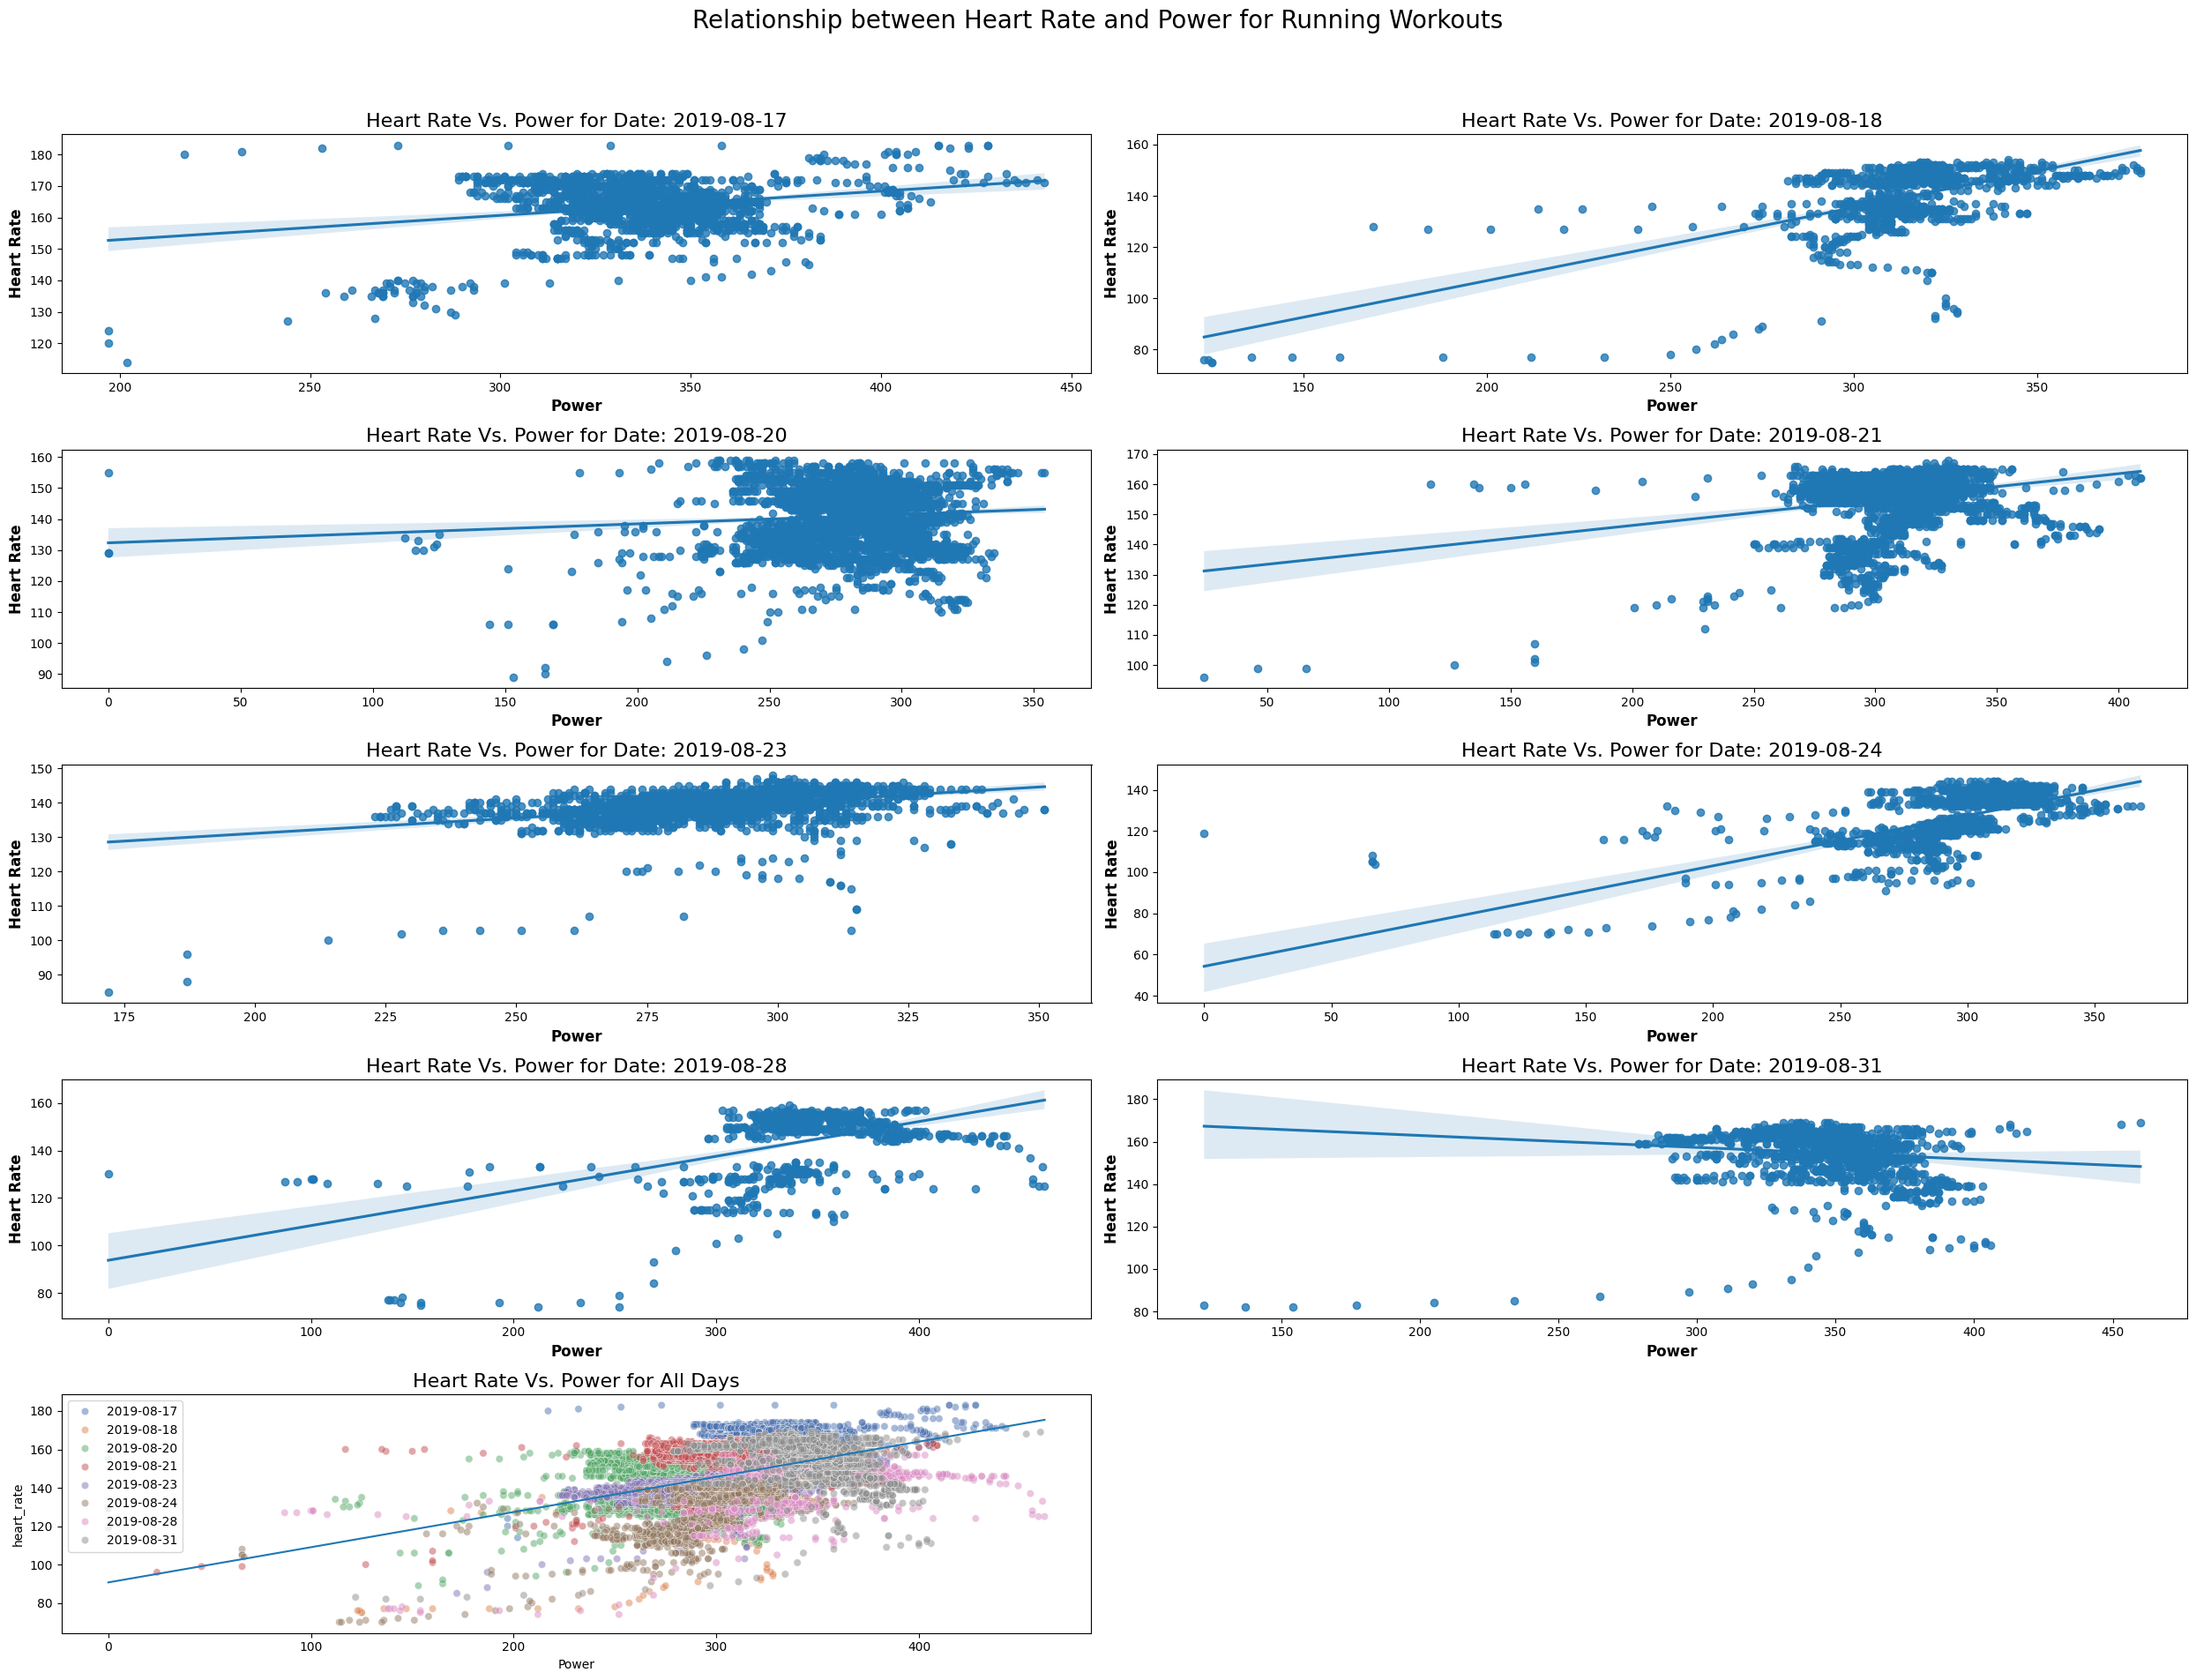

In [293]:
df_run = df[(df['used_bike'] == False) & (df['Ground Time'] > 0)]

# df_run.dropna()
df_run = df_run.dropna(subset=['Power'])

##
x = df_run['Power']
y = df_run['heart_rate']
m, b = np.polyfit(x,y,1)

x_fitted = np.linspace(x.min(), x.max(), 100)
y_fitted = (m * x_fitted) + b
print(len(y_fitted))
print(len(x_fitted))
df_fitted = pd.DataFrame({
    'x': x_fitted,
    'y': y_fitted
})

# df_fitted.hvplot.line(x='x', y='y', color='black', legend='top')
##


# YOUR CODE HERE: Create the figure and subplots
fig = plt.figure(figsize=(25,20))

count = 1
for group, data in df_run.groupby('date'):
    ax = fig.add_subplot(5, 2, count)
    # ax.set_xlim(global_min_x+1, global_max_x+1)
    # ax.set_ylim(global_min_y+1, global_max_y+1)
    # ax.set_xlabel('x', fontweight='bold', fontsize=12)
    
    # ax.set_title('dataset_'+str(count), fontsize=16)
    sns.regplot(data=data, x='Power', y='heart_rate', ax=ax)
    ax.set_ylabel('Heart Rate', fontweight='bold', fontsize=12)
    ax.set_xlabel('Power', fontweight='bold', fontsize=12)
    ax.set_title('Heart Rate Vs. Power for Date: ' + str(group), fontsize=16)
    r,p = pearsonr(data['Power'], data['heart_rate'])
    print(r)
    count += 1

ax2 = fig.add_subplot(5, 2, count)
sns.scatterplot(data=df_run, x='Power', y='heart_rate', hue='date', palette='deep', alpha=0.5, ax=ax2)
count += 1

# ax3 = fig.add_subplot(5, 2, count)
# sns.regplot(data=df_run, x='Power', y='heart_rate', ax=ax3)
sns.lineplot(data=df_fitted, x='x', y='y', ax=ax2)

fig.suptitle('Relationship between Heart Rate and Power for Running Workouts', fontsize=20)

plt.title('Heart Rate Vs. Power for All Days', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## remember above ^ fix tick marks, add r value

heatmap

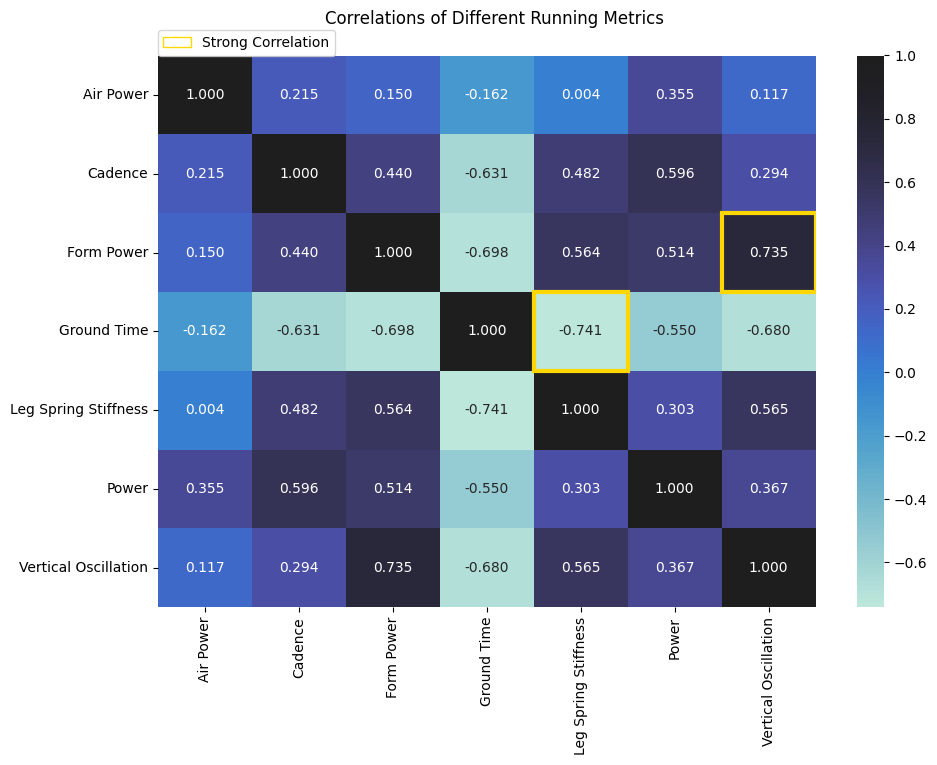

In [156]:
df_run_heatmap = df_run[['Air Power', 'Cadence', 'Form Power', 'Ground Time',
       'Leg Spring Stiffness', 'Power', 'Vertical Oscillation']]

corr = df_run_heatmap.corr()
golden_patch = mpatches.Patch(edgecolor='gold', facecolor='none', label='Strong Correlation')

fig, ax = plt.subplots(figsize=(10,8))

ax_heat = sns.heatmap(data=corr, ax=ax, annot=True, center=True, fmt='.3f')

## highlight cells
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if j > i:
              val = corr.iloc[i, j]
              if abs(val) >= 0.7 and i != j:
                     ax_heat.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='gold', lw=3))



plt.suptitle('Correlations of Different Running Metrics')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.legend(handles=[golden_patch],loc=(0,1))
plt.show()

line plot cadence of running vs cycling

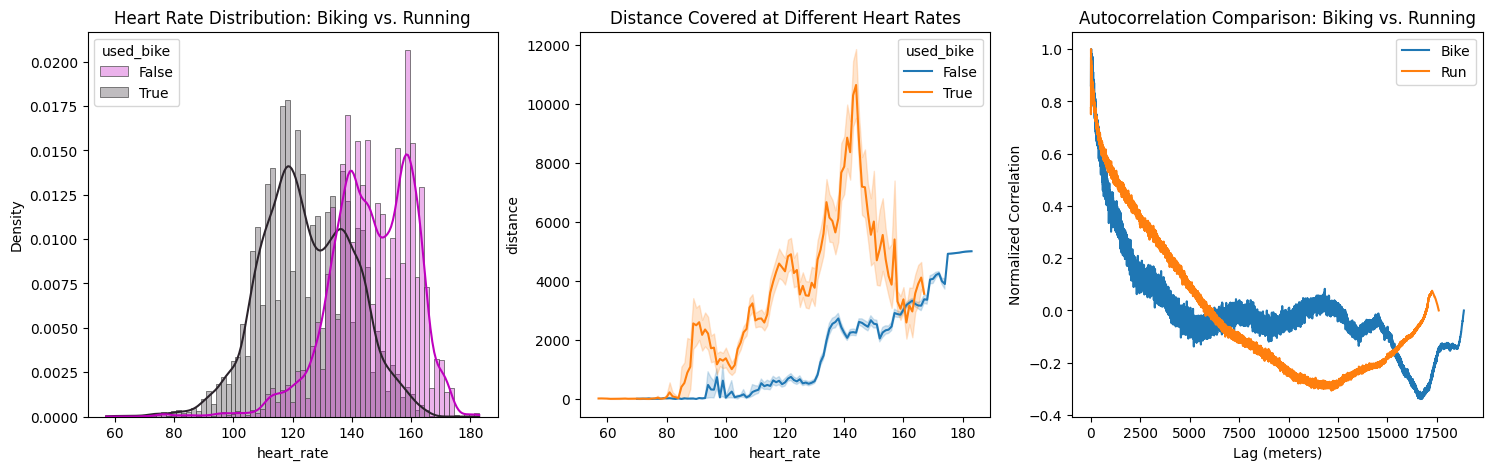

<Figure size 640x480 with 0 Axes>

In [ ]:
df_bike = df[(df['used_bike'] == True)]

df_bike.dropna()
df_filtered = df[df['cadence']>50]
df_filtered.dropna()

fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1, 3, 1)


# for data, group in df_bike.groupby('date'):

ax.set_title('Heart Rate Distribution: Biking vs. Running')
sns.histplot(
    df_filtered,
    x="heart_rate", hue="used_bike",
    palette="dark:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    ax=ax,
    kde=True,
    alpha=0.3,
    stat='density'
)
ax_line = fig.add_subplot(1, 3, 2)
ax_line.set_title('Distance Covered at Different Heart Rates')
sns.lineplot(data=df_filtered, x='heart_rate', y='distance', hue='used_bike', ax=ax_line)

ax_corr = fig.add_subplot(1, 3, 3)
sorted_df = df_filtered.sort_values(by='distance')

sorted_df = sorted_df.dropna(subset=['heart_rate'])
sorted_bike_df = sorted_df[sorted_df['used_bike'] == True]
sorted_run_df = sorted_df[sorted_df['used_bike'] == False]


x_bike = sorted_bike_df['heart_rate'] - sorted_bike_df['heart_rate'].mean()
autocorr_bike = np.correlate(x_bike, x_bike, mode='full')
autocorr_bike = autocorr_bike[x_bike.size:]
autocorr_bike /= autocorr_bike.max()

x_run = sorted_run_df['heart_rate'] - sorted_run_df['heart_rate'].mean()
autocorr_run = np.correlate(x_run, x_run, mode='full')
autocorr_run = autocorr_run[x_run.size:]
autocorr_run /= autocorr_run.max()



plt.plot(autocorr_bike, label='Bike')
plt.plot(autocorr_run, label="Run")
plt.xlabel('Lag (meters)')
plt.ylabel('Normalized Correlation')
plt.title('Autocorrelation Comparison: Biking vs. Running')
plt.legend()
plt.show()

fig.suptitle('Various Plots of Biking vs. Running')
plt.tight_layout()
plt.show()




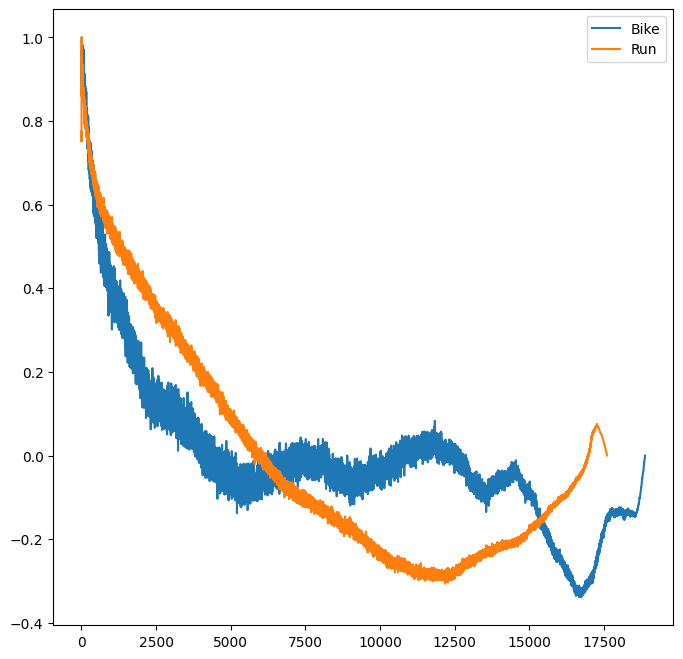

distance
0.00        13
2951.74      7
884.36       4
3011.29      4
1623.78      3
            ..
1551.90      1
1551.86      1
1551.69      1
1551.67      1
38638.63     1
Name: count, Length: 35409, dtype: int64

In [ ]:
ax_corr = plt.figure(figsize=(8,8))
sorted_df = df_filtered.sort_values(by='distance')

sorted_df = sorted_df.dropna(subset=['heart_rate'])
sorted_bike_df = sorted_df[sorted_df['used_bike'] == True]
sorted_run_df = sorted_df[sorted_df['used_bike'] == False]


x_bike = sorted_bike_df['heart_rate'] - sorted_bike_df['heart_rate'].mean()
autocorr_bike = np.correlate(x_bike, x_bike, mode='full')
autocorr_bike = autocorr_bike[x_bike.size:]
autocorr_bike /= autocorr_bike.max()

x_run = sorted_run_df['heart_rate'] - sorted_run_df['heart_rate'].mean()
autocorr_run = np.correlate(x_run, x_run, mode='full')
autocorr_run = autocorr_run[x_run.size:]
autocorr_run /= autocorr_run.max()

plt.plot(autocorr_bike, label='Bike')
plt.plot(autocorr_run, label="Run")
plt.legend()
plt.show()



# sorted_df.describe()

# plt.gca().acorr(x, usevlines=False, maxlags=700, normed=True, lw=2);

# sorted_df['distance'].value_counts()
    

100
100


<Axes: xlabel='x', ylabel='y'>

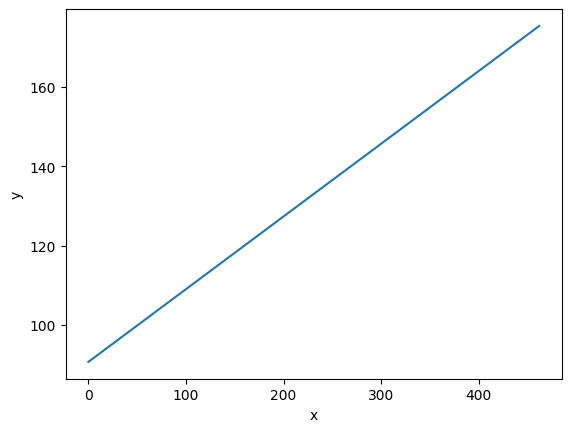

In [101]:
x = df_run['Power']
y = df_run['heart_rate']
m, b = np.polyfit(x,y,1)

x_fitted = np.linspace(x.min(), x.max(), 100)
y_fitted = (m * x_fitted) + b
print(len(y_fitted))
print(len(x_fitted))
df_fitted = pd.DataFrame({
    'x': x_fitted,
    'y': y_fitted
})
sns.lineplot(data=df_fitted, x='x', y='y')
# df_fitted.hvplot.line(x='x', y='y', color='black', legend='top')

In [78]:
def create_scatter_plot():
    return   df_run.hvplot.scatter(x='Power', y='heart_rate', by='date',
                  legend='right', height=600, width=1000, ylabel='Heart Rate', subplots=True, label='Relationship Between Power and Heart Rate While Running') 

    # return scatter_matrix(data=df_run)

line of best fit

In [73]:
overlays = []
for group, data in df_run.groupby('date'):
    scatter = data.hvplot.scatter(x='Power', y='heart_rate',
                  legend='right', height=600, width=1000, ylabel='Heart Rate', label='Relationship Between Power and Heart Rate While Running') 
    
    x = data['Power']
    y = data['heart_rate']
    m, b = np.polyfit(x,y,1)

    x_fitted = np.linspace(x.min(), x.max(), 100)
    y_fitted = (m * x_fitted) + b
    print(len(y_fitted))
    print(len(x_fitted))
    df_fitted = pd.DataFrame({
        'x': x_fitted,
        'y': y_fitted
    })

    trend = df_fitted.hvplot.line(x='x', y='y', color='black', legend='top')
    overlays.append(scatter * trend)

overlay = overlays[0]
for o in overlays[1:]:
    overlay += o

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [81]:
# Combine controls and plot into a dashboar

dashboard = pn.Column(
    create_scatter_plot
)

# Display the dashboard
dashboard


BokehModel(combine_events=True, render_bundle={'docs_json': {'dbb3e0d0-108e-4c10-99b9-d3e269ef7174': {'version…

In [15]:
import bokeh
import jupyter_bokeh
import sys
import notebook
print("notebook version:", notebook.__version__)

print("Bokeh version:", bokeh.__version__)
print("jupyter_bokeh version:", jupyter_bokeh.__version__)
print("Python version:", sys.version)

notebook version: 7.4.4
Bokeh version: 3.4.3
jupyter_bokeh version: 4.0.5
Python version: 3.9.6 (default, Apr 30 2025, 02:07:17) 
[Clang 17.0.0 (clang-1700.0.13.5)]
